## Libraries

In [239]:
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
import seaborn as sns


## Importing the dataset from csv file to dataframe

In [240]:
df=pd.read_csv('SFBayArea_Price.csv')
df.head()

,Price,Bed,Bath,Size,StreetAddress,City/State/Zip,Commute,Crime,URL
0,"$2,000,000",3 Beds,2 Baths,"1,371 sqft",6571 Capri Way,"San Jose, CA 95129",96% of residents commute by car.,Lowest crime relative to the rest of Santa Cla...,https://www.trulia.com/p/ca/san-jose/6571-capr...
1,"$1,350,000",3 Beds,1 Bath,"1,458 sqft",2023 Bray Ave,"Santa Clara, CA 95050",92% of residents commute by car.,Moderate crime relative to the rest of Santa C...,https://www.trulia.com/p/ca/santa-clara/2023-b...
2,"$1,375,000",3 Beds,2 Baths,"1,250 sqft",1264 Maryann Dr,"Santa Clara, CA 95050",92% of residents commute by car.,Lowest crime relative to the rest of Santa Cla...,https://www.trulia.com/p/ca/santa-clara/1264-m...
3,"$2,100,000",4 Beds,2 Baths,"2,113 sqft",1062 Castleton Way,"Sunnyvale, CA 94087",94% of residents commute by car.,Lowest crime relative to the rest of Santa Cla...,https://www.trulia.com/p/ca/sunnyvale/1062-cas...
4,"$1,888,000",3 Beds,2 Baths,"1,674 sqft",683 Toyon Ave,"Sunnyvale, CA 94086",92% of residents commute by car.,Low crime relative to the rest of Santa Clara ...,https://www.trulia.com/p/ca/sunnyvale/683-toyo...


In [241]:
df.shape

(243, 9)

## Data Cleaning

### Checking duplicate rows 

In [242]:
duplicateRowsDF = df[df.duplicated()]
print("Number of duplicate rows: ",duplicateRowsDF.shape[0])
# Drop the duplicate rows 
df = df.drop_duplicates()

Number of duplicate rows:  0


### Dropping the missing or null values

In [243]:
print("No. of rows with missing values:\n", df.isnull().sum())
df = df.dropna()
df
print("After removing missing values:\n", df.isnull().sum()) # After dropping the values

No. of rows with missing values:
 Price             0
Bed               0
Bath              0
Size              3
StreetAddress     0
City/State/Zip    0
Commute           0
Crime             0
URL               0
dtype: int64
After removing missing values:
 Price             0
Bed               0
Bath              0
Size              0
StreetAddress     0
City/State/Zip    0
Commute           0
Crime             0
URL               0
dtype: int64


## Data Pre-processing

In [244]:
df.dtypes

Price             object
Bed               object
Bath              object
Size              object
StreetAddress     object
City/State/Zip    object
Commute           object
Crime             object
URL               object
dtype: object

### Extracting the useful information from String Variables

In [245]:
df1 = df
df1['Price'] = df1['Price'].map(lambda x: x.lstrip('$')).str.replace(",","").astype(float)
df1['Bed'] = df1['Bed'].map(lambda x: x.rstrip('Beds')).astype(float)
df1['Bath'] = df1['Bath'].map(lambda x: x.rstrip('Baths')).astype(float)
df1['Size'] = df1['Size'].map(lambda x: x.rstrip(' sqft'), na_action='ignore').str.replace(",","").astype(float)
df2 = df1['City/State/Zip'].apply(lambda x: x.split(","))
df1['City'] = df2.apply(lambda x: " ".join(x[-2].split()[:]))
df1['Commute']  = df1.Commute.str.extract('(\d+)').astype(float)
df1['Crime']  = df1.Crime.str.extract('^(.*?)(?=[ ])')

df1.dtypes

Price             float64
Bed               float64
Bath              float64
Size              float64
StreetAddress      object
City/State/Zip     object
Commute           float64
Crime              object
URL                object
City               object
dtype: object

### Detecting Outliers 

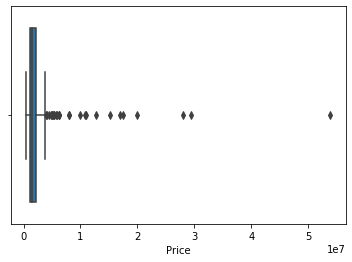

In [246]:
sns.boxplot(x=df1['Price'])

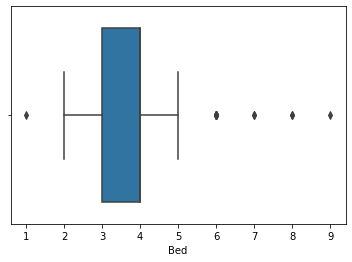

In [247]:
sns.boxplot(x=df1['Bed'])

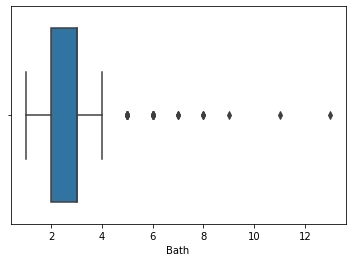

In [248]:
sns.boxplot(x=df1['Bath'])

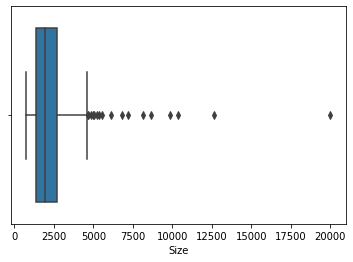

In [249]:
sns.boxplot(x=df1['Size'])

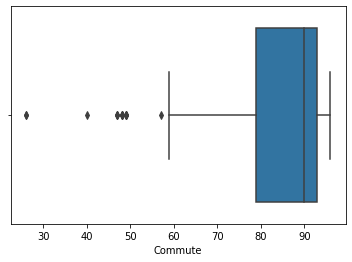

In [250]:
sns.boxplot(x=df1['Commute'])

### Get rid of some outliers after checking boxplots

In [251]:
df_price = df1[df1['Price'] < 5000000]
df_bed = df_price[df_price['Bed'] < 6]
df_bath = df_bed[df_bed['Bath'] < 6]
df_size = df_bath[df_bath['Size'] < 10000]
df_commute = df_size[df_size['Commute'] > 40]
df1 = df_commute
df1

,Price,Bed,Bath,Size,StreetAddress,City/State/Zip,Commute,Crime,URL,City
0,2000000.0,3.0,2.0,1371.0,6571 Capri Way,"San Jose, CA 95129",96.0,Lowest,https://www.trulia.com/p/ca/san-jose/6571-capr...,San Jose
1,1350000.0,3.0,1.0,1458.0,2023 Bray Ave,"Santa Clara, CA 95050",92.0,Moderate,https://www.trulia.com/p/ca/santa-clara/2023-b...,Santa Clara
2,1375000.0,3.0,2.0,1250.0,1264 Maryann Dr,"Santa Clara, CA 95050",92.0,Lowest,https://www.trulia.com/p/ca/santa-clara/1264-m...,Santa Clara
3,2100000.0,4.0,2.0,2113.0,1062 Castleton Way,"Sunnyvale, CA 94087",94.0,Lowest,https://www.trulia.com/p/ca/sunnyvale/1062-cas...,Sunnyvale
4,1888000.0,3.0,2.0,1674.0,683 Toyon Ave,"Sunnyvale, CA 94086",92.0,Low,https://www.trulia.com/p/ca/sunnyvale/683-toyo...,Sunnyvale
...,...,...,...,...,...,...,...,...,...,...
234,895000.0,2.0,1.0,3947.0,983 Regal Rd,"Berkeley, CA 94708",72.0,Lowest,https://www.trulia.com/p/ca/berkeley/983-regal...,Berkeley
235,820000.0,4.0,2.0,3054.0,1341 Parker St,"Berkeley, CA 94702",63.0,Lowest,https://www.trulia.com/p/ca/berkeley/1341-park...,Berkeley
237,3600000.0,5.0,5.0,1720.0,1160 Cragmont Ave,"Berkeley, CA 94708",72.0,Lowest,https://www.trulia.com/p/ca/berkeley/1160-crag...,Berkeley
238,2175000.0,3.0,5.0,2139.0,524 Cragmont Ave,"Berkeley, CA 94708",72.0,Lowest,https://www.trulia.com/p/ca/berkeley/524-cragm...,Berkeley


### Remove records that capture few data from border of the cities 

In [252]:
df2 = df1
df2 = df2.groupby("City").filter(lambda x : len(x)>5)
df2.to_csv(r'/Users/krishna/Analytics/BAN612_DataAnalytics/Project/Filtered_Data.csv', index = False)
df2

,Price,Bed,Bath,Size,StreetAddress,City/State/Zip,Commute,Crime,URL,City
0,2000000.0,3.0,2.0,1371.0,6571 Capri Way,"San Jose, CA 95129",96.0,Lowest,https://www.trulia.com/p/ca/san-jose/6571-capr...,San Jose
1,1350000.0,3.0,1.0,1458.0,2023 Bray Ave,"Santa Clara, CA 95050",92.0,Moderate,https://www.trulia.com/p/ca/santa-clara/2023-b...,Santa Clara
2,1375000.0,3.0,2.0,1250.0,1264 Maryann Dr,"Santa Clara, CA 95050",92.0,Lowest,https://www.trulia.com/p/ca/santa-clara/1264-m...,Santa Clara
3,2100000.0,4.0,2.0,2113.0,1062 Castleton Way,"Sunnyvale, CA 94087",94.0,Lowest,https://www.trulia.com/p/ca/sunnyvale/1062-cas...,Sunnyvale
4,1888000.0,3.0,2.0,1674.0,683 Toyon Ave,"Sunnyvale, CA 94086",92.0,Low,https://www.trulia.com/p/ca/sunnyvale/683-toyo...,Sunnyvale
...,...,...,...,...,...,...,...,...,...,...
234,895000.0,2.0,1.0,3947.0,983 Regal Rd,"Berkeley, CA 94708",72.0,Lowest,https://www.trulia.com/p/ca/berkeley/983-regal...,Berkeley
235,820000.0,4.0,2.0,3054.0,1341 Parker St,"Berkeley, CA 94702",63.0,Lowest,https://www.trulia.com/p/ca/berkeley/1341-park...,Berkeley
237,3600000.0,5.0,5.0,1720.0,1160 Cragmont Ave,"Berkeley, CA 94708",72.0,Lowest,https://www.trulia.com/p/ca/berkeley/1160-crag...,Berkeley
238,2175000.0,3.0,5.0,2139.0,524 Cragmont Ave,"Berkeley, CA 94708",72.0,Lowest,https://www.trulia.com/p/ca/berkeley/524-cragm...,Berkeley


### Reset the index of final dataframe for further analysis

In [253]:
df3 = df2
df3 = df3.reset_index(drop=True)
df3.to_csv(r'/Users/krishna/Analytics/BAN612_DataAnalytics/Project/Filtered_Data1.csv', index = False)
df3

,Price,Bed,Bath,Size,StreetAddress,City/State/Zip,Commute,Crime,URL,City
0,2000000.0,3.0,2.0,1371.0,6571 Capri Way,"San Jose, CA 95129",96.0,Lowest,https://www.trulia.com/p/ca/san-jose/6571-capr...,San Jose
1,1350000.0,3.0,1.0,1458.0,2023 Bray Ave,"Santa Clara, CA 95050",92.0,Moderate,https://www.trulia.com/p/ca/santa-clara/2023-b...,Santa Clara
2,1375000.0,3.0,2.0,1250.0,1264 Maryann Dr,"Santa Clara, CA 95050",92.0,Lowest,https://www.trulia.com/p/ca/santa-clara/1264-m...,Santa Clara
3,2100000.0,4.0,2.0,2113.0,1062 Castleton Way,"Sunnyvale, CA 94087",94.0,Lowest,https://www.trulia.com/p/ca/sunnyvale/1062-cas...,Sunnyvale
4,1888000.0,3.0,2.0,1674.0,683 Toyon Ave,"Sunnyvale, CA 94086",92.0,Low,https://www.trulia.com/p/ca/sunnyvale/683-toyo...,Sunnyvale
...,...,...,...,...,...,...,...,...,...,...
193,895000.0,2.0,1.0,3947.0,983 Regal Rd,"Berkeley, CA 94708",72.0,Lowest,https://www.trulia.com/p/ca/berkeley/983-regal...,Berkeley
194,820000.0,4.0,2.0,3054.0,1341 Parker St,"Berkeley, CA 94702",63.0,Lowest,https://www.trulia.com/p/ca/berkeley/1341-park...,Berkeley
195,3600000.0,5.0,5.0,1720.0,1160 Cragmont Ave,"Berkeley, CA 94708",72.0,Lowest,https://www.trulia.com/p/ca/berkeley/1160-crag...,Berkeley
196,2175000.0,3.0,5.0,2139.0,524 Cragmont Ave,"Berkeley, CA 94708",72.0,Lowest,https://www.trulia.com/p/ca/berkeley/524-cragm...,Berkeley


## Exploratory Data Analysis

### Summary Statistics

In [254]:
df3.describe()

,Price,Bed,Bath,Size,Commute
count,1.980000e+02,198.000000,198.000000,198.000000,198.000000
mean,1.598046e+06,3.580808,2.570707,2193.070707,85.095960
std,8.024832e+05,0.837591,0.998756,1327.553502,12.540124
min,4.099000e+05,2.000000,1.000000,726.000000,47.000000
25%,1.057250e+06,3.000000,2.000000,1355.500000,80.000000
50%,1.399000e+06,4.000000,2.000000,1866.500000,90.000000
75%,1.898000e+06,4.000000,3.000000,2637.250000,93.000000
max,4.950000e+06,5.000000,5.000000,9857.000000,96.000000


### Scatterplot

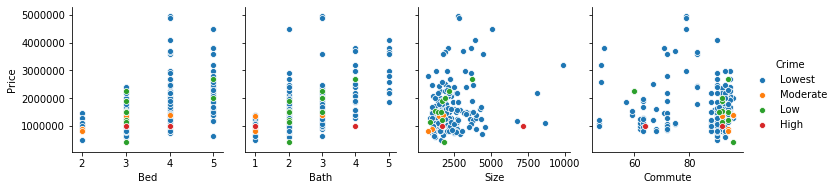

In [255]:
sns.pairplot(df3,x_vars=['Bed','Bath','Size','Commute'],y_vars=['Price'],hue='Crime')

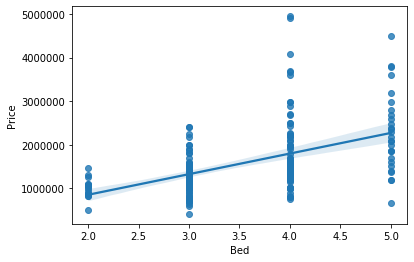

In [257]:
sns.regplot("Bed", "Price", df3)

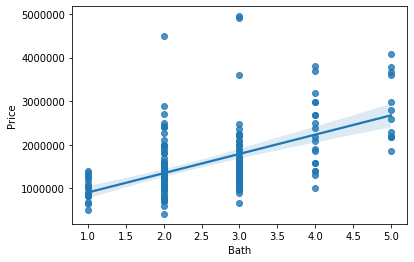

In [258]:
sns.regplot("Bath", "Price", df3)

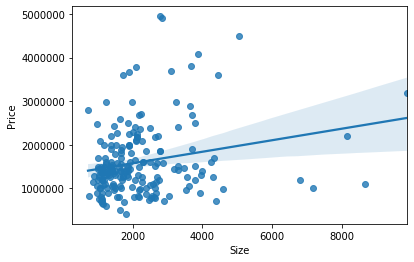

In [259]:
sns.regplot("Size", "Price", df3)

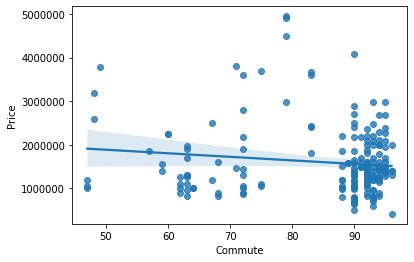

In [260]:
sns.regplot("Commute", "Price", df3)

### Check for Multicollinearity

In [261]:
# Correlation Matrix

correlations = df3.corr()
correlations

,Price,Bed,Bath,Size,Commute
Price,1.000000,0.493526,0.550831,0.219282,-0.127341
Bed,0.493526,1.000000,0.633305,0.175495,0.066192
Bath,0.550831,0.633305,1.000000,0.217831,-0.077348
Size,0.219282,0.175495,0.217831,1.000000,-0.200462
Commute,-0.127341,0.066192,-0.077348,-0.200462,1.000000


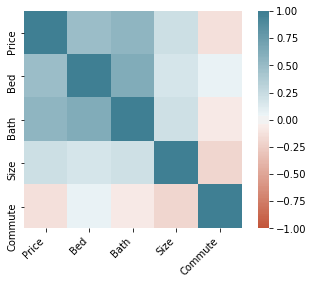

In [262]:
# Correlation Plot

ax = sns.heatmap(
    correlations, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

### Heatmap

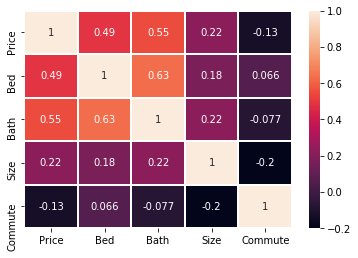

In [263]:
sns.heatmap(df3.corr(),annot=True,lw=1)

### Trend between two variables

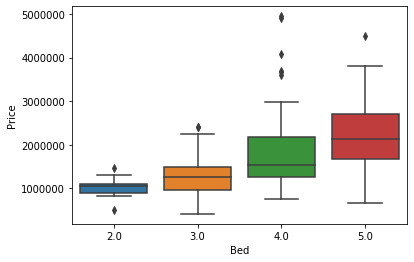

In [264]:
sns.boxplot(x="Bed", y="Price",data=df3)

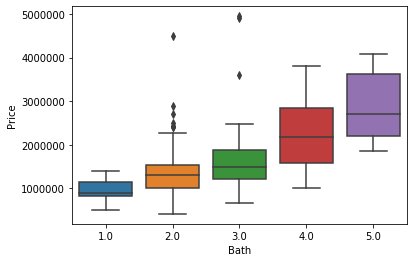

In [265]:
sns.boxplot(x="Bath", y="Price",data=df3)

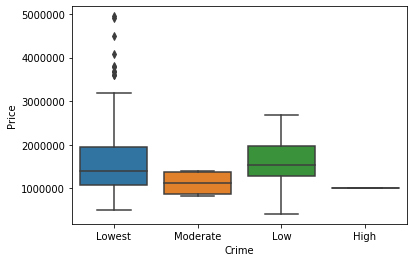

In [266]:
sns.boxplot(x="Crime", y="Price",data=df3)

## Which is the most affordable city in Bay Area?

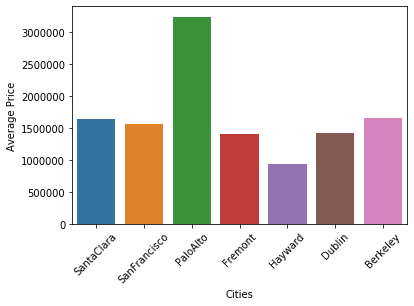

In [267]:
Price= df3[['Price','Bed']]
Price
Price.mean()

SanJose_SantaClara_Sunnyvale = Price[0:54]
SanJose_SantaClara_Sunnyvale
Col1= SanJose_SantaClara_Sunnyvale.loc[:,"Price"].mean()

SanFrancisco = Price[55:77]
SanFrancisco
Col2=SanFrancisco.loc[:,"Price"].mean()

PaloAlto = Price[78:91]
PaloAlto
Col3=PaloAlto.loc[:,"Price"].mean()

Fremont = Price[92:118]
Fremont
Col4=Fremont.loc[:,"Price"].mean()

Hayward = Price[119:148]
Hayward
Col5=Hayward.loc[:,"Price"].mean()

Dublin_SanRamon = Price[149:174]
Dublin_SanRamon
Col6=Dublin_SanRamon.loc[:,"Price"].mean()

Berkeley = Price[175:197]
Berkeley
Col7=Berkeley.loc[:,"Price"].mean()

df_afford=pd.DataFrame({'Cities':['SantaClara','SanFrancisco','PaloAlto','Fremont','Hayward','Dublin','Berkeley'],
                   'Average Price':[Col1,Col2,Col3,Col4,Col5,Col6,Col7]})
                  
sns.barplot(x='Cities',y='Average Price',data=df_afford)
plt.xticks(rotation=45)
plt.show()


## Multivariate Regression using sklearn
- Regression coefficients tell an interesting story about the market’s perception of value associated with marginal changes to various aspects of the home and its location.
- The pricing model can enable identification of undervalued listings and neighborhoods, offering investment recommendations of potential interest to individual homebuyers and investors alike.
- Here Ordinary least squares (OLS) regression analysis is applied to the data using Statsmodels and Scikit-learn libraries. 

For building efficient predictive model, we would only include variables that uniquely explain some amount of variance in the price. Hence we are drawing a correlation plot here .

### Creating dummies for Crime rate

In [268]:
df4 = df3

X = df4[['Bed','Bath','Size','Commute','Crime']]
Y = df4['Price']
X = pd.get_dummies(X)
X.head()

,Bed,Bath,Size,Commute,Crime_High,Crime_Low,Crime_Lowest,Crime_Moderate
0,3.0,2.0,1371.0,96.0,0,0,1,0
1,3.0,1.0,1458.0,92.0,0,0,0,1
2,3.0,2.0,1250.0,92.0,0,0,1,0
3,4.0,2.0,2113.0,94.0,0,0,1,0
4,3.0,2.0,1674.0,92.0,0,1,0,0


### Creating a train and test dataset

In [269]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=101)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(158, 8)
(40, 8)
(158,)
(40,)


In [270]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [271]:
# print the intercept
print(model.intercept_)

201281.89522959944


In [272]:
coeff_parameter = pd.DataFrame(model.coef_,X.columns,columns=['Coefficient'])
coeff_parameter

,Coefficient
Bed,280863.402320
Bath,291653.071930
Size,48.782759
Commute,-7042.140208
Crime_High,-580988.864606
Crime_Low,227621.881256
Crime_Lowest,163751.124224
Crime_Moderate,189615.859126


In [273]:
predictions = model.predict(X_test)
predictions

array([1559038.85907509, 1492588.06133467, 1934279.4773522 ,
       1795928.08661704, 1516000.29976799, 1848111.70188781,
       1540417.78206364, 1214599.35586745, 2669676.47647838,
       1376376.93554118, 1256050.76413669, 1289736.97066094,
       2355175.65039289, 1856418.70789838, 2250120.13148702,
       1490114.07758462, 2424157.9576909 , 1456060.22580067,
       1539740.08055106, 1179538.48904003, 1777120.48579618,
       1828222.32572808,  966664.31593816,  619001.08624702,
       1619597.45719425, 1200802.5780912 , 1534253.73151973,
       1204030.9200408 , 1552622.21488655, 1827121.1785118 ,
       2105228.202195  , 1503489.23342657,  888049.18828479,
        901206.59627728, 1872914.25234075, 1813559.5714826 ,
       1798290.56788497, 1765895.32991035,  630025.98980313,
       1615325.48322487])

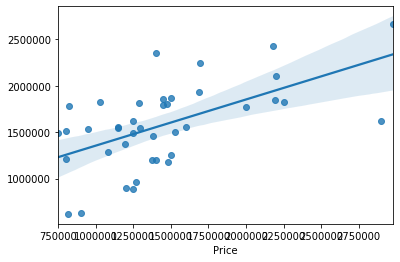

In [274]:
sns.regplot(y_test,predictions)

In [275]:
import statsmodels.api as sm

X_train_Sm= sm.add_constant(X_train)
X_train_Sm= sm.add_constant(X_train)
ls=sm.OLS(y_train,X_train_Sm).fit()
print(ls.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.373
Model:                            OLS   Adj. R-squared:                  0.344
Method:                 Least Squares   F-statistic:                     12.76
Date:                Wed, 12 May 2021   Prob (F-statistic):           8.56e-13
Time:                        23:57:03   Log-Likelihood:                -2345.1
No. Observations:                 158   AIC:                             4706.
Df Residuals:                     150   BIC:                             4731.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const            1.61e+05    3.9e+05      0.

## Multivariate Regression using Statsmodel

In [236]:
import statsmodels.formula.api as smf

df5 = pd.get_dummies(df3, prefix='Crime', prefix_sep='_', columns = ['Crime'])
mvr_model = smf.ols('Price ~ Bed+Bath+Size+Commute+Crime_High+Crime_Low+Crime_Lowest+Crime_Moderate', data=df5).fit()
print(mvr_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.367
Model:                            OLS   Adj. R-squared:                  0.343
Method:                 Least Squares   F-statistic:                     15.71
Date:                Wed, 12 May 2021   Prob (F-statistic):           3.39e-16
Time:                        23:08:09   Log-Likelihood:                -2927.1
No. Observations:                 198   AIC:                             5870.
Df Residuals:                     190   BIC:                             5897.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       2.517e+05   3.27e+05      0.